<a href="https://colab.research.google.com/github/vijaykumarharakuni/Deeplearning/blob/main/ObjectIdentification_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print('imported')

imported


In [2]:
print('imported')
!wget https://pjreddie.com/media/files/yolov3.weights

imported
--2025-03-15 17:08:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  18.0MB/s    in 9.5s    

2025-03-15 17:08:32 (25.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#Load the Class Names and Generate random colors for Objects Detection


In [3]:
classes=None
with open('coco.names','r') as f:
    classes=[line.strip() for line in f.readlines()]
    COLORS=np.random.uniform(0,255,size=(len(classes),3))

In [16]:
image=cv2.imread('/content/download.jfif')
width=image.shape[1]
height=image.shape[0]
scale=0.00392

In [17]:
print(image.shape)

(183, 275, 3)


Load the Pretrain YoloV2 Weights and Conf

In [18]:
model=cv2.dnn.readNet(model='yolov3.weights',config='yolov3.cfg')
print('loaded successfully')

loaded successfully


Generate Blob for yolov3object detecttion

In [19]:
# blob is multidim  array - 4 dims , batch size, channels, height, width [1,3,416,416]
blob=cv2.dnn.blobFromImage(image,scalefactor=scale,size=(416,416),mean=(0,0,0),swapRB=True,crop=False)

In [20]:
model.setInput(blob)

In [21]:
def get_output_layers(net):
  layer_names=net.getLayerNames()
  output_layers=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]
  return output_layers

In [22]:
def draw_bounding_box(img,class_id,confidence,x,y,x_plus_w,y_plus_h):
  label=str(classes[class_id])
  color=COLORS[class_id]
  cv2.rectangle(img,(x,y),(x_plus_w,y_plus_h),color,2)
  cv2.putText(img,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

In [23]:
outs=model.forward(get_output_layers(model))

In [24]:
class_ids=[]
confidences=[]
boxes=[]
conf_threshold=0.5
nms_threshold=0.4

In [25]:
for out in outs:
  for detection in out:
    scores=detection[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]
    if confidence>0.5:
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)
      x=center_x-w/2
      y=center_y-h/2
      class_ids.append(class_id)
      confidences.append(float(confidence))
      boxes.append([x,y,w,h])

In [26]:
indices=cv2.dnn.NMSBoxes(boxes,confidences,conf_threshold,nms_threshold)
for i in indices:
    box=boxes[i]
    left=box[0]
    top=box[1]
    width=box[2]
    height=box[3]
    draw_bounding_box(image,class_ids[i],confidences[i],int(left),int(top),int(left+width),int(top+height))

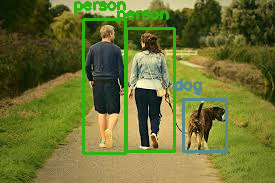

In [27]:
# display image in google colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)